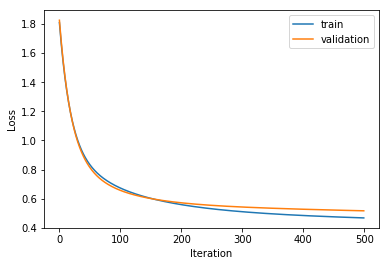

In [2]:
from sklearn import datasets as ds
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib.pyplot as plt

feature_size = 14
x, y = ds.load_svmlight_file("./Australian")
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.3)


train_x = train_x.toarray().astype(np.float32)
temp = np.ones(shape=[len(train_y), 1], dtype=np.float32)
train_x = np.concatenate([train_x, temp], axis=1)
val_x = val_x.toarray().astype(np.float32)
temp = np.ones(shape=[len(val_y), 1], dtype=np.float32)
val_x = np.concatenate([val_x, temp], axis=1)
train_y = train_y.astype(np.float32).reshape([len(train_y), 1])
val_y = val_y.astype(np.float32).reshape([len(val_y), 1])

ite = []
train_loss_set = []
val_loss_set = []

w = np.random.rand(feature_size + 1, 1)
bias = np.zeros(shape=[feature_size + 1, 1])
bias[len(bias)-1][0] = 1.

# training
iteration = 500
lr = 0.01
C = 0.001
for i in range(0, iteration):
    ite.append(i)
    pred = np.matmul(train_x, w)
    hinge_loss = np.maximum(1 - train_y * pred, 0)
    train_loss = np.mean(hinge_loss ** 2) + C * np.sum((w - bias) ** 2)
    gradient = -np.matmul(train_x.transpose(), hinge_loss * train_y) / len(train_y)
    w -= lr * (gradient + 2 * C * (w - w[len(w) - 1][0] * bias))
    train_loss_set.append(train_loss)

    val_pred = np.matmul(val_x, w)
    val_hinge_loss = np.maximum(1 - val_y * val_pred, 0)
    val_loss = np.mean(val_hinge_loss ** 2) + C * np.sum((w - w[len(w) - 1][0] * bias) ** 2)
    val_loss_set.append(val_loss)

plt.plot(ite, train_loss_set, label='train')
plt.plot(ite, val_loss_set, label='validation')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()